In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
csv = []
j = 0
for i in range(1,11):
    filepath = "月子中心/北京月子中心"+str(i)+".htm" 
    #print(filepath)
    file = open(filepath,"r")
    text = file.read()
    soup = BeautifulSoup(text, "html.parser")
    shops = soup.select('#shop-all-list ul li')
    #print(shops)
    for shop in shops:
        j = j+1
        #print(shop)
        item = []
        name = shop.select("h4")[0].get_text()
        item.append(name)
        if(len(shop.select("a.review-num b"))>0):
            review = shop.select("a.review-num b")[0].get_text()
            item.append(int(review))
        else:
            item.append(None)
        if(len(shop.select("a.mean-price b"))>0):
            price = shop.select("a.mean-price b")[0].get_text()
            item.append(int(price.strip("￥")))
        else:
            item.append(None)
        tag = shop.select(".tag-addr a span.tag")[0].get_text()
        item.append(tag)
        location = shop.select(".tag-addr a span.tag")[1].get_text()
        item.append(location)
        if(len(shop.select("div.svr-info a"))>0):
            promotion = shop.select("div.svr-info a")[0].get_text()
            item.append(promotion)
        else:
            item.append(None)
        csv.append(item)

In [2]:
df = pd.DataFrame(csv,columns=['名称','评论','人均消费','标签','地点','团购'])

In [3]:
df.to_csv("yuezi.csv")

In [4]:
import matplotlib.pyplot as plt

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 6 columns):
名称      161 non-null object
评论      131 non-null float64
人均消费    87 non-null float64
标签      161 non-null object
地点      161 non-null object
团购      63 non-null object
dtypes: float64(2), object(4)
memory usage: 7.6+ KB


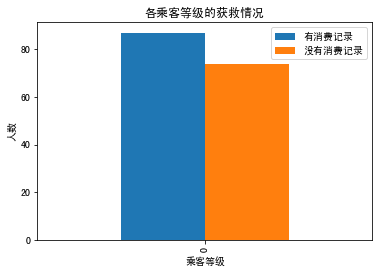

In [6]:
priceSt=pd.DataFrame({u'有消费记录':87, u'没有消费记录':74},index=[0])
priceSt.plot(kind='bar')
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")
plt.show()

人均消费大于3万元的月子中心有 53
5万以下     14
6万       10
7万       10
8万        2
9万        3
10万       2
11万       3
12万       3
15万       4
20万       2
20万以上     0
Name: 人均消费, dtype: int64


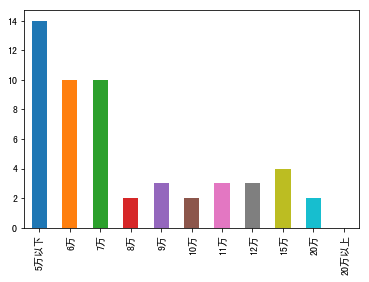

In [7]:
#price = df['人均消费'][df['人均消费'].notnull()]
price = df['人均消费'][df['人均消费']>30000]
print("人均消费大于3万元的月子中心有",price.shape[0])
price_bucket = [0,50000,60000,70000,80000,90000,100000,110000,120000,150000,200000,800000]
labels = ['5万以下','6万','7万','8万','9万','10万','11万','12万','15万','20万','20万以上']
price_dis = pd.cut(price,bins=price_bucket,labels=labels)
print(price_dis.value_counts().sort_index())
price_dis.value_counts().sort_index().plot(kind='bar')
#a_discretized_1 = pd.cut(a, bins=boundaries, labels=False) 

望京          12
亚运村         11
通州区          6
天通苑          5
王府井/东单       5
亦庄           5
四季青          4
酒仙桥          4
大望路          4
建外大街         4
北苑家园         4
亮马桥/三元桥      4
双井           3
朝阳公园/团结湖     3
朝阳区          3
国贸           3
方庄           3
百子湾          3
双榆树          2
昌平镇          2
Name: 地点, dtype: int64


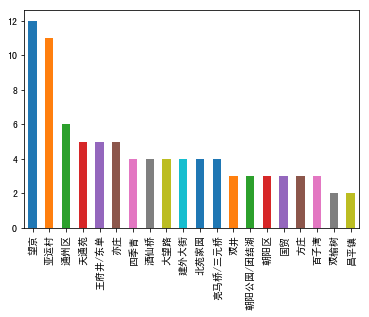

In [8]:
location = df['地点'][df['地点'].notnull()]
print(location.value_counts()[0:20])
location.value_counts()[0:20].plot(kind='bar')

In [9]:
comments = df['评论'][df['评论'].notnull()]
print("总评论数：",np.sum(comments.values))

总评论数： 16595.0


In [10]:
comments_sorted = df.sort_values("评论",ascending=False)
print("评论数排前十：",comments_sorted[:10][['名称','评论']])

评论数排前十：                   名称      评论
45     好孕妈妈月嫂(凯旋城总店)  1281.0
20      禧月阁月子中心(望京店)  1247.0
13           新妈妈月子中心  1027.0
24      馨月汇月子中心(朝阳店)   873.0
46           爱育华妇儿医院   570.0
80       享月月嫂公司(朝阳店)   558.0
67       佳翊会母婴护理服务中心   430.0
6         莱弗月子会所Life   409.0
60   亿婴宝•月嫂服务中心(朝阳店)   370.0
31  爱玛家月子会所 十五年的月子会所   353.0


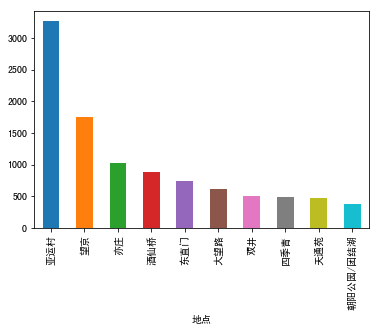

In [11]:
comment_location = df['评论'].groupby(df['地点']).sum().sort_values(ascending=False)[:10]
comment_location.plot(kind="bar")

月子会所     104
月嫂        22
产后恢复      11
月子餐        5
开奶催乳       5
妇幼医院       5
婴儿游泳       3
月子护理       2
榛果民宿       1
私教工作室      1
月子服务       1
海外生子       1
Name: 标签, dtype: int64


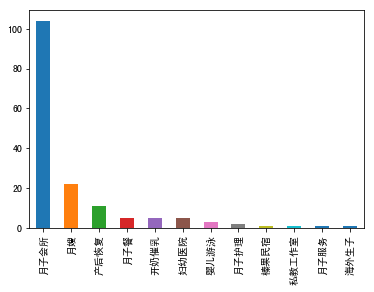

In [12]:
print(df['标签'].value_counts())
df['标签'].value_counts().plot(kind='bar')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


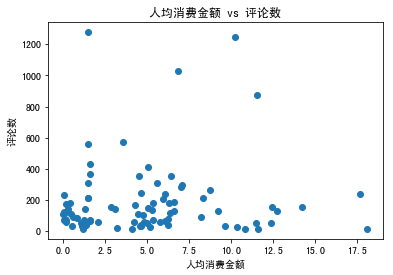

In [18]:
comments_price = df[df['评论'].notnull()][df['人均消费'].notnull()]
comments = comments_price['评论']
price = comments_price['人均消费']/10000
plt.scatter(price,comments)
plt.title(u"人均消费金额 vs 评论数")
plt.xlabel(u"人均消费金额")
plt.ylabel(u"评论数")
plt.show()

In [13]:
df.describe()

,评论,人均消费
count,131.000000,87.000000
mean,126.679389,48546.252874
std,210.274921,41696.278174
min,1.000000,98.000000
25%,14.500000,13468.500000
50%,55.000000,46319.000000
75%,149.500000,65226.000000
max,1281.000000,181341.000000
